In [1]:
##importing libraries
#To store and proces data in dataframe
import pandas as pd
#for numerical analysis
import numpy as np
#for data visualization
import seaborn as sns 
#for data visualization
import matplotlib.pyplot as plt
#to split dataset into training and test sets
from sklearn.model_selection import train_test_split
#decision tree classifier
from sklearn.tree import DecisionTreeClassifier
#for ploting trees
from sklearn import tree
#calculatin accuracy in the models
from sklearn.metrics import accuracy_score
#for fiting random forest classification
from sklearn.ensemble import RandomForestClassifier
#for adaptive boosting classification
from sklearn.ensemble import AdaBoostClassifier
#for gradient boost clasification
from sklearn.ensemble import GradientBoostingClassifier
#extreme gradient boosting classification
#import xgboost
from xgboost import XGBClassifier
# confusion matrix
from sklearn.metrics import confusion_matrix
#classification report
from sklearn.metrics import classification_report

In [2]:
path ="https://github.com/daisichela/project-showcase/raw/main/Maternal%20Health%20Risk%20Data%20Set.csv"
##Exploratory data analysis and visualization
#Glimpse of the data
data = pd.read_csv(path)


In [3]:
print(data.head())

   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
0   25         130           80  15.0      98.0         86  high risk
1   35         140           90  13.0      98.0         70  high risk
2   29          90           70   8.0     100.0         80  high risk
3   30         140           85   7.0      98.0         70  high risk
4   35         120           60   6.1      98.0         76   low risk


In [4]:
###data type
data.dtypes

Age              int64
SystolicBP       int64
DiastolicBP      int64
BS             float64
BodyTemp       float64
HeartRate        int64
RiskLevel       object
dtype: object

In [5]:
#Missing values

missing_values_count = data.isnull().sum()

print(missing_values_count)


Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


In [6]:
print(data.describe())


               Age   SystolicBP  DiastolicBP           BS     BodyTemp  \
count  1014.000000  1014.000000  1014.000000  1014.000000  1014.000000   
mean     29.871795   113.198225    76.460552     8.725986    98.665089   
std      13.474386    18.403913    13.885796     3.293532     1.371384   
min      10.000000    70.000000    49.000000     6.000000    98.000000   
25%      19.000000   100.000000    65.000000     6.900000    98.000000   
50%      26.000000   120.000000    80.000000     7.500000    98.000000   
75%      39.000000   120.000000    90.000000     8.000000    98.000000   
max      70.000000   160.000000   100.000000    19.000000   103.000000   

         HeartRate  
count  1014.000000  
mean     74.301775  
std       8.088702  
min       7.000000  
25%      70.000000  
50%      76.000000  
75%      80.000000  
max      90.000000  


In [7]:
###filtering out those outside the child bearing age (>50 years)
new_data = data.drop(data[(data['Age']>50)].index)



In [8]:
##filters age less than 15 years
new_data = new_data.drop(new_data[(new_data['Age']<15)].index) 

In [9]:
print(new_data.describe())


              Age  SystolicBP  DiastolicBP          BS    BodyTemp   HeartRate
count  865.000000  865.000000   865.000000  865.000000  865.000000  865.000000
mean    27.936416  113.675145    76.654335    8.554393   98.627052   74.750289
std     10.198692   18.218063    13.736005    3.097375    1.336614    8.046599
min     15.000000   70.000000    49.000000    6.000000   98.000000    7.000000
25%     19.000000  100.000000    65.000000    6.900000   98.000000   70.000000
50%     25.000000  120.000000    80.000000    7.500000   98.000000   76.000000
75%     35.000000  120.000000    90.000000    7.900000   98.000000   80.000000
max     50.000000  160.000000   100.000000   19.000000  103.000000   90.000000


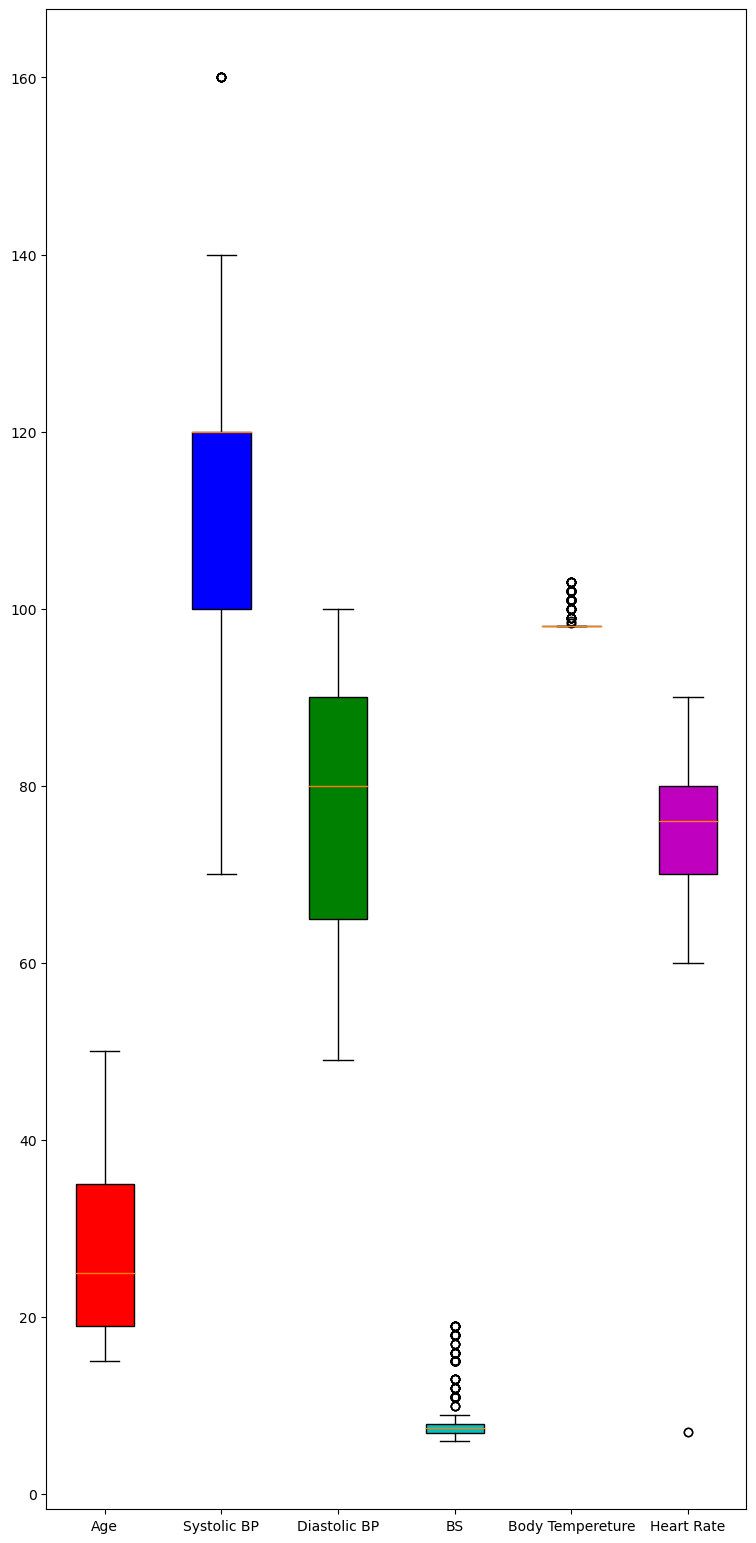

In [10]:
###boxplot of the fearures

plot_data = new_data[['Age','SystolicBP','DiastolicBP','BS','BodyTemp','HeartRate']]
##plot
fig = plt.figure(figsize =(7, 15))
ax = fig.add_axes([0, 0, 1, 1])
# Creating plot
box=plt.boxplot(plot_data, patch_artist=True)
##changing colors

colors = ['r', 'b','g', 'c','y','m']
 
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

##box plot labels

ax.set_xticklabels(['Age','Systolic BP','Diastolic BP','BS','Body Tempereture','Heart Rate'])
 
# show plot
plt.show()

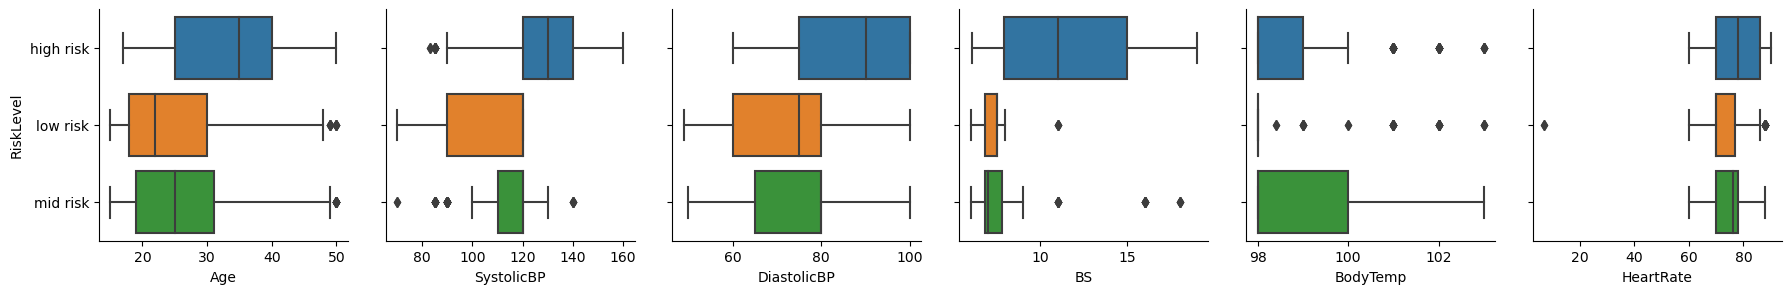

In [11]:
# relationship between risk level and age, systolic and diastolic blood pressure, body size,body tempereture and heart rate 
g = sns.PairGrid(new_data, x_vars=['Age','SystolicBP','DiastolicBP','BS','BodyTemp','HeartRate'], y_vars="RiskLevel", height=3.0)
g.map(sns.boxplot)

In [12]:
##correlation between variables
correlation = new_data. corr ()  
correlation. style. background_gradient (cmap = 'BrBG')  

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate
Age,1.000000,0.471852,0.429356,0.511182,-0.221222,0.137147
SystolicBP,0.471852,1.000000,0.767419,0.375217,-0.246896,-0.048337
DiastolicBP,0.429356,0.767419,1.000000,0.375366,-0.221607,-0.071549
BS,0.511182,0.375217,0.375366,1.000000,-0.066823,0.210189
BodyTemp,-0.221222,-0.246896,-0.221607,-0.066823,1.000000,0.141667
HeartRate,0.137147,-0.048337,-0.071549,0.210189,0.141667,1.000000


In [13]:
##spliting data into training,validation and test sets

RiskLevel = {'low risk':0, 
        'mid risk':1, 
        'high risk':2}
##converting feature to float

# apply using map
new_data['RiskLevel'] = new_data['RiskLevel'].map(RiskLevel).astype(float)


labels = ['RiskLevel']
features=['Age','SystolicBP','DiastolicBP','BS','BodyTemp','HeartRate']

y= new_data[labels]
x = new_data[features]

# set aside 20% of train and test data for evaluation
X_train, X_test, y_train, y_test = train_test_split(x, y,
    test_size=0.3, random_state = 8)



In [14]:
print(new_data.tail())

      Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate  RiskLevel
1008   48         120           80  11.0      98.0         88        2.0
1009   22         120           60  15.0      98.0         80        2.0
1011   35          85           60  19.0      98.0         86        2.0
1012   43         120           90  18.0      98.0         70        2.0
1013   32         120           65   6.0     101.0         76        1.0


[Text(0.4625, 0.9, 'X[3] <= 7.95\ngini = 0.656\nsamples = 605\nvalue = [249, 192, 164]'),
 Text(0.25, 0.7, 'X[1] <= 132.5\ngini = 0.57\nsamples = 449\nvalue = [242, 161, 46]'),
 Text(0.15, 0.5, 'X[1] <= 125.0\ngini = 0.518\nsamples = 417\nvalue = [242, 158, 17]'),
 Text(0.1, 0.3, 'X[3] <= 7.055\ngini = 0.504\nsamples = 395\nvalue = [242, 136, 17]'),
 Text(0.05, 0.1, 'gini = 0.536\nsamples = 209\nvalue = [101, 100, 8]'),
 Text(0.15, 0.1, 'gini = 0.386\nsamples = 186\nvalue = [141, 36, 9]'),
 Text(0.2, 0.3, 'gini = 0.0\nsamples = 22\nvalue = [0, 22, 0]'),
 Text(0.35, 0.5, 'X[3] <= 6.85\ngini = 0.17\nsamples = 32\nvalue = [0, 3, 29]'),
 Text(0.3, 0.3, 'gini = 0.42\nsamples = 10\nvalue = [0, 3, 7]'),
 Text(0.4, 0.3, 'gini = 0.0\nsamples = 22\nvalue = [0, 0, 22]'),
 Text(0.675, 0.7, 'X[3] <= 9.5\ngini = 0.386\nsamples = 156\nvalue = [7, 31, 118]'),
 Text(0.55, 0.5, 'X[0] <= 31.0\ngini = 0.587\nsamples = 38\nvalue = [4, 18, 16]'),
 Text(0.5, 0.3, 'X[4] <= 99.0\ngini = 0.532\nsamples = 27\nva

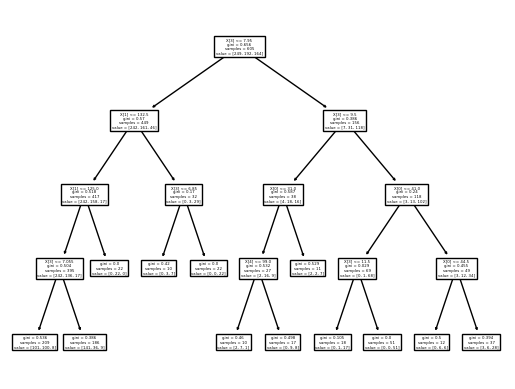

In [15]:
##Decision tree

decision_tree = DecisionTreeClassifier(max_depth=4,
min_samples_leaf=10, min_samples_split=10)
decision_tree.fit(X_train,y_train)
tree.plot_tree(decision_tree)




In [16]:
##model accuracy

predictions = decision_tree.predict(X_test)


print("Train accuracy:",decision_tree.score(X_train,y_train))

print("Test accuracy:",decision_tree.score(X_test,y_test))


Train accuracy: 0.6909090909090909
Test accuracy: 0.65


In [17]:
##Random forest classifier

random_forest_classifier = RandomForestClassifier(random_state=0,
n_estimators=5, max_depth=6)
random_forest_classifier.fit(X_train, y_train)


C:\Users\daisy.chelangat\AppData\Local\Temp\ipykernel_22104\1438722089.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_classifier.fit(X_train, y_train)


RandomForestClassifier(max_depth=6, n_estimators=5, random_state=0)

In [18]:
r_predictions= random_forest_classifier.predict(X_test)
print("Train accuracy:",random_forest_classifier.score(X_train,y_train))

print("Test accuracy:",random_forest_classifier.score(X_test,y_test))


Train accuracy: 0.8033057851239669
Test accuracy: 0.7423076923076923


In [19]:
##ADABOOST classifier

adaboost_classifier = AdaBoostClassifier(random_state=0, n_estimators=1000)
adaboost_classifier.fit(x,y)


C:\Users\daisy.chelangat\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(n_estimators=1000, random_state=0)

In [20]:
print("Train accuracy:",adaboost_classifier.score(X_train,y_train))

print("Test accuracy:",adaboost_classifier.score(X_test,y_test))


Train accuracy: 0.7338842975206612
Test accuracy: 0.7115384615384616


In [21]:
##Gradient boosting
gradient_boosting_classifier = GradientBoostingClassifier(random_state=0, n_estimators=1000)
gradient_boosting_classifier.fit(x, y)


C:\Users\daisy.chelangat\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9153846153846154

In [22]:
gb_predictions= adaboost_classifier.predict(X_test)
print("Train accuracy:",gradient_boosting_classifier.score(X_train,y_train))

print("Test accuracy:",gradient_boosting_classifier.score(X_test,y_test))


Train accuracy: 0.9256198347107438
Test accuracy: 0.9153846153846154


In [75]:

xgboost_classifier = XGBClassifier(random_state=0)
xgboost_classifier.fit(x, y)


ValueError: Invalid classes inferred from unique values of `y`.  Expected: [0 1 2], got [1. 2. 3.]